In [ ]:
from PIL import Image

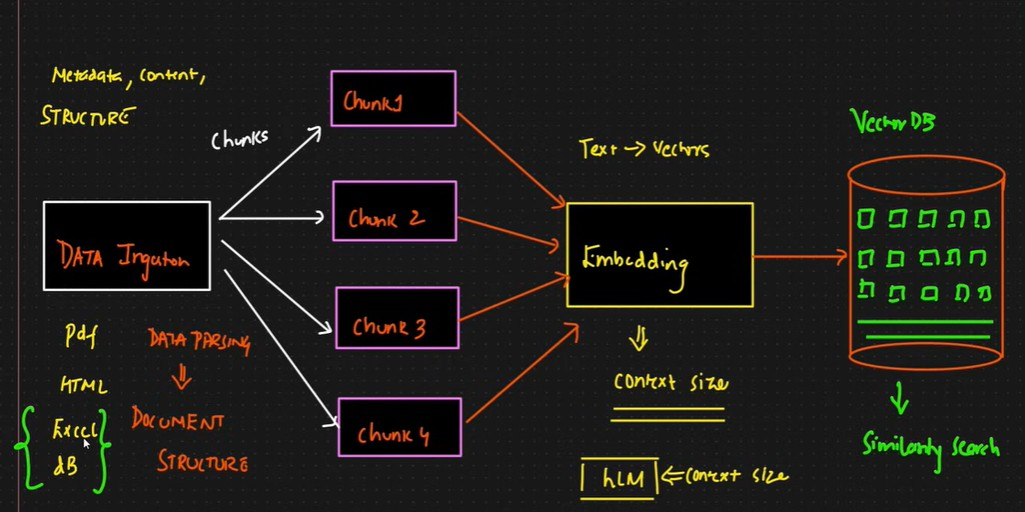

In [ ]:
Image.open(r'/content/data_ingestion_pipeline.jpg')

In [ ]:
!pip3 install langchain-community
!pip3 install langchain-core
!pip3 install pypdf
!pip3 install pymupdf

In [ ]:
## Data Ingestion

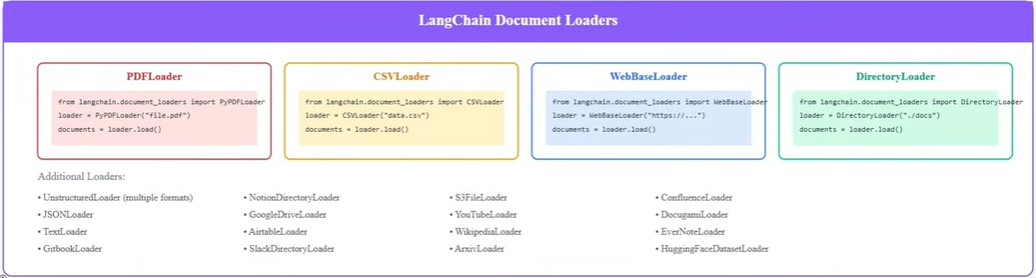

In [ ]:
Image.open(r'/content/langchain_docuemnt_loader.jpg')

In [ ]:
## Data Ingestion

In [ ]:
from langchain_core.documents import Document
doc=Document(page_content="This is my document. It is full of text that I've never read.",metadata={"source":'example.txt',"pages":1,"author":"sai","date_create":2021-01-01})
print(doc)

page_content='This is my document. It is full of text that I've never read.'


In [ ]:
## we can also create a simple text file using Textloader

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.document_loaders import TextLoader
loader=TextLoader(,encoding="utf-8")
document=loader.load()
print(document)


In [ ]:
## Directory Loader

In [ ]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_core.document_loaders import pypdf
dir_loader=DirectoryLoader(,glob="**/*.txt",loader_cls=TextLoader,loader_kwargs={"encoding":"utf-8"},show_progress=True)

dir_loader.load()

In [ ]:
## Embedding and vector store

In [ ]:
!pip3 install sentence-transformers
!pip3 install faiss-cpu
!pip3 install chromadb

In [ ]:
## embedding and vectorstore db

In [ ]:
from sentence_transformers import SentenceTransformers
from chromadb.config import Settings
import chromabd
from sklearn.metrics.pairwise import cosine_similarity
import uuid
from typing import List,Dict,Any,Tuple

In [ ]:
class EmbeddingModel:
  def __init__(self,model_name:str="all-MiniLM-L6-v2"):
    self.model_name=model_name
    self.model=None
    self._load_model()
  def _load_model(self):
    try:
      print("Loading Model..")
      self.model=SentenceTransformers(self.model_name)
    except Exception as e:
      print(f"Error loading model: {e}")
  def generate_embeddings():
    ## generating embeddings for a list of texts
    if not self.model:
      raise ValueError("Model not loaded")
    embeddings=self.model.encode(texts,show_progress=True)
    print(f" Generated embeddings with shape {embeddings.shape}")
    return embeddings

In [ ]:
embedding=EmbeddingModel

In [ ]:
## vectorstore

In [ ]:
class VectorStore:
  def __init__(self,):
    self.collection_name=collection_name
    self.persist_directory=persist_directory
    self.client=Chroma(persist_directory=persist_directory,collection_name=collection_name)
    self.collection=None
    self._initialize_store()
  def initialize_store(self):
    try:
      os.makedirs(self.persist_directory,exist_ok=True)
      self.client=Chroma(persist_directory=self.persist_directory,collection_name=self.collection_name)
      self.collection=self.client.get_collection(name=self.collection_name)
      if self.collection is None:
        self.collection=self.client.create_collection(name=self.collection_name)
      print(f"vector store initialized with collection {self.collection_name}")
    except Exception as e:
      print(f"Error initializing vector store: {e}")
  def add_document(self,documents,embeddings:np.ndarray):
    if len(documents)!=len(embeddings):
      raise ValueError("There is no match found..")
    print(f"Adding {len(documents)} documents to the vector store"
    ##print data for chromadb
    ids=[]
    metadata=[]
    document_text=[]
    embedding_list=[]
    for i,(doc,embeddings) in enumerate(zip(document,embeddings)):
      ## generate unique id
      doc_id=f"doc_{uuid.uuid4().hex(8)}_{i}"
      ids.append(doc_id)


In [ ]:
## convert text to embeddings

In [ ]:
texts=[doc.page_content for doc in chuncks]
print(texts)
## generate the embeddings
embeddings=EmbeddingModel.generate_embeddings(text)

##store in the vector database
vectorstore.add_documents(texts,embeddings)

In [ ]:
## retrieve pipeline from vectorstore

In [ ]:
class RagRetriever:
  def __init__(self,vector_store):
    self.vectorstore=vector_store
    self.embedding_manager=embedding_manager
  def retriever(self,query,top_k:int=5,score_threshold:float=0.0):
    print(f"Retriving documents from query:{query}")
    print(f"Top k:{top_k}, Score threshold:{score_threshold}")
    # generate query emebddings
    query_embedding=self.embedding_manager.generate_embeddings([query])[0]
    ## search in vectorstore
    try:
      results=self.vector_store.collection_query(query_embeddings=query_embedding,n_results=top_k,score_threshold=score_threshold)
      #process result
      retrieved_docs=[]
      if result['documents'] and result['documents'][0]:
        documents=results['documents'][0]
        metadata=results['metadata'][0]
        distance=results['distance'][0]
        ids=results['ids'][0]
        for i,(doc_id,document,meta,distance) in enumerate(zip(ids,documents,metadata,distance)):
          similatiy_score=1-similatiy_score
          if similatiy_score>=score_threshold:
            retrieved_docs.append({"id":doc_id,"content":document,"metadata":meta,"score":similatiy_score})
        print(f" Retrieved {len(retrieved_docs)} documents(after filtering)")
      else:
        print("No documents found")
      return retrieved_docs
    except Exception as e:
      print(f"Error in retriever:{e}")
      return []

In [ ]:
rag_retriever=RagRetriever(vector_store,embedding_manager)

In [ ]:
rag_retriever.retrieve("what is Transformer all we need")